# Explore here

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

total_data = pd.read_csv("/workspaces/UNSUPERVISED_LEARNING/data/raw/housing.csv")
total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
from sklearn.model_selection import train_test_split

# Seleccionar las columnas relevantes
df_filtrado = total_data[['Latitude', 'Longitude', 'MedInc']]

# Dividir en train y test (por ejemplo, 80% train, 20% test)
X_train, X_test = train_test_split(df_filtrado, test_size=0.2, random_state=42)

print(df_filtrado)

       Latitude  Longitude  MedInc
0         37.88    -122.23  8.3252
1         37.86    -122.22  8.3014
2         37.85    -122.24  7.2574
3         37.85    -122.25  5.6431
4         37.85    -122.25  3.8462
...         ...        ...     ...
20635     39.48    -121.09  1.5603
20636     39.49    -121.21  2.5568
20637     39.43    -121.22  1.7000
20638     39.43    -121.32  1.8672
20639     39.37    -121.24  2.3886

[20640 rows x 3 columns]


In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train)

X_test_clusters = kmeans.predict(X_test)

# Creamos una copia del test y le añadimos la columna 'cluster'
X_test_con_clusters = X_test.copy()
X_test_con_clusters['cluster'] = X_test_clusters


/tmp/ipykernel_7846/4171223156.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['cluster'] = kmeans.predict(df_filtrado)


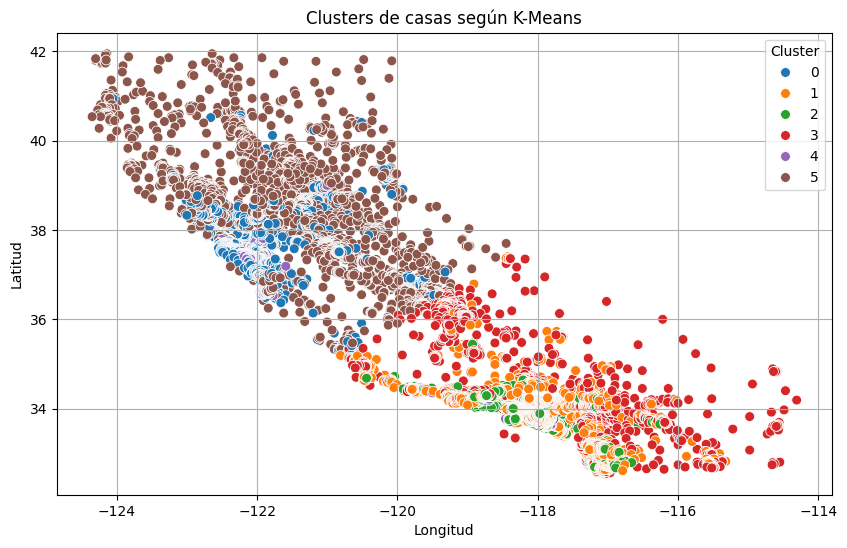

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenar el modelo KMeans con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train)

# Predecir los clusters para todos los datos (también podemos predecir test más adelante)
df_filtrado['cluster'] = kmeans.predict(df_filtrado)

# Visualizar los clusters en un diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtrado, x='Longitude', y='Latitude', hue='cluster', palette='tab10', s=50)
plt.title('Clusters de casas según K-Means')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


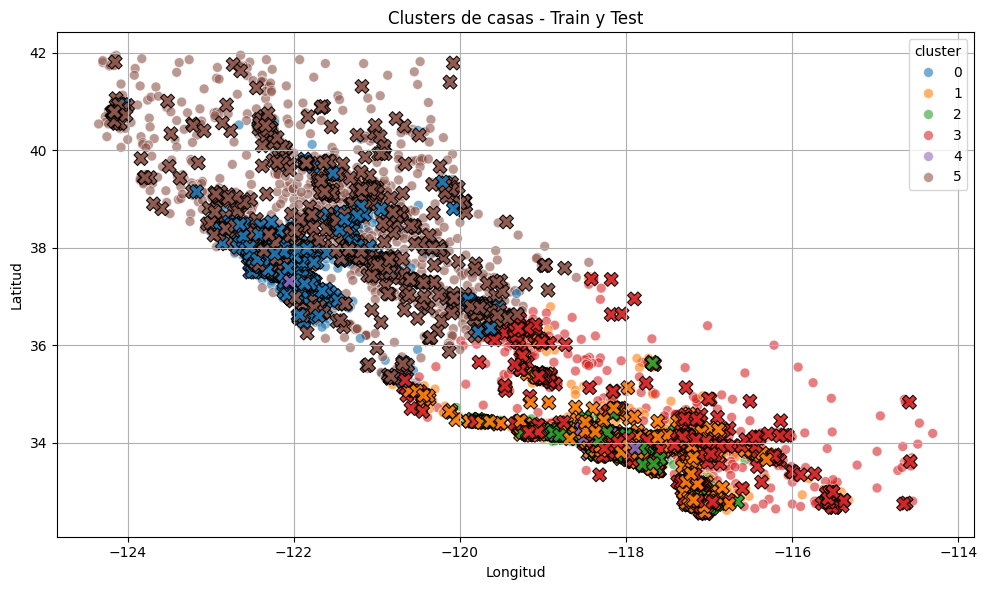

In [27]:
# Crear figura
plt.figure(figsize=(10, 6))

# Graficar datos de entrenamiento
sns.scatterplot(
    data=df_filtrado,
    x='Longitude',
    y='Latitude',
    hue='cluster',
    palette='tab10',
    s=50,
    alpha=0.6,
    legend='brief'
)

# Graficar datos de test (misma paleta, pero usando marcadores 'X' y borde negro)
sns.scatterplot(
    data=X_test_con_clusters,
    x='Longitude',
    y='Latitude',
    hue='cluster',
    palette='tab10',
    s=100,
    marker='X',
    edgecolor='black',
    alpha=0.9,
    legend=False  # Para evitar conflicto de leyendas duplicadas
)

plt.title('Clusters de casas - Train y Test')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.tight_layout()
plt.show()



In [28]:
# Paso 4: Entrenar un modelo de clasificación supervisada

# Usamos las etiquetas de cluster generadas por K-Means como etiquetas de clase
y_train = kmeans.labels_[X_train.index]  # Etiquetas de cluster para el conjunto de entrenamiento
y_test = kmeans.labels_[X_test.index]    # Etiquetas de cluster para el conjunto de prueba

# Ahora vamos a usar un árbol de decisión como modelo de clasificación
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

# Imprimir las estadísticas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

IndexError: index 17445 is out of bounds for axis 0 with size 16512